In [35]:
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import numpy as np

In [36]:
cr=pd.read_csv(r"C:\Users\akash\Downloads\CreditRisk.csv")
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [37]:
cr.shape

(981, 13)

# Checking Null Values

In [38]:
cr.isnull().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64

In [39]:
cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    float64
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 99.8+ KB


In [40]:
cr.isnull().sum()[cr.isnull().sum()>0]

Gender              24
Married              3
Dependents          25
Self_Employed       55
LoanAmount          27
Loan_Amount_Term    20
Credit_History      79
dtype: int64

In [41]:
cr.isnull().sum()[cr.isnull().sum()*100/cr.shape[0]>50]

Series([], dtype: int64)

# Filling Null Values

In [42]:
cr.Gender=cr.Gender.fillna('Male')
cr.Married =cr.Married.fillna('Yes')
cr.Dependents=cr.Dependents.fillna(0)
cr.Self_Employed =cr.Self_Employed .fillna('No')
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(0)

In [43]:
cr.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Label Encoder

labelencoder is used to convert categorical variable into numberical format because machine learning models only understand numerical data.

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
cr[cr.select_dtypes(include='object').columns]=cr[cr.select_dtypes(include='object').columns].apply(le.fit_transform)

In [46]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [47]:
cr = cr.drop(['Loan_ID'],axis =1 )

# Sampling

In [48]:
from sklearn.model_selection import train_test_split 

In [49]:
cr_train,cr_test=train_test_split(cr,test_size=0.2)

In [50]:
cr_train_y=cr_train.iloc[:,-1]
cr_test_y=cr_test.iloc[:,-1]

In [51]:
cr_train_x=cr_train.iloc[:,0:-1]
cr_test_x=cr_test.iloc[:,0:-1]

# Model Building

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logi_cr=LogisticRegression()

In [54]:
logi_cr.fit(cr_train_x,cr_train_y)

LogisticRegression()

# Prediction

In [55]:
pred=logi_cr.predict(cr_test_x)
pred

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
#to build the confusion matrix for evaluating the parameters
from sklearn.metrics import confusion_matrix

In [57]:
cr_tab=confusion_matrix(cr_test_y,pred)     #confusion_matrix(actual,predicted)
cr_tab

array([[ 24,  26],
       [ 13, 134]], dtype=int64)

In [58]:
#Accuracy

In [59]:
cr_tab.diagonal().sum()*100/cr_tab.sum()

80.20304568527919

In [60]:
#or

from sklearn.metrics import accuracy_score
accuracy_score(cr_test_y,pred)*100


80.20304568527918

In [61]:
#Recall(Tpr)=TP/TP+FN

In [62]:
from sklearn.metrics import recall_score

In [63]:
recall_score(cr_test_y,pred)*100

91.15646258503402

In [64]:
#Precision=TP/TP+FP

In [65]:
from sklearn.metrics import precision_score

In [66]:
precision_score(cr_test_y,pred)*100

83.75

In [67]:
#F1 ratio=2*Precision*Recall/Precision+Recall

In [68]:
from sklearn.metrics import f1_score

In [69]:
f1_score(cr_test_y,pred)*100

87.29641693811075

In [70]:
#AUROC curve

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [74]:
pred_prob=logi_cr.predict_proba(cr_test_x)

In [77]:
pred_prob[0:5]

array([[0.14012008, 0.85987992],
       [0.23753587, 0.76246413],
       [0.27294644, 0.72705356],
       [0.09504241, 0.90495759],
       [0.3041131 , 0.6958869 ]])

In [76]:
roc_auc_score(cr_test_y,pred_prob[:,1])

0.7533333333333333

In [78]:
fpr,tpr,ther=roc_curve(cr_test_y,pred_prob[:,1])

In [79]:
import matplotlib.pyplot as plt

Text(0.5, 0.5, 'AUROC score is 7534')

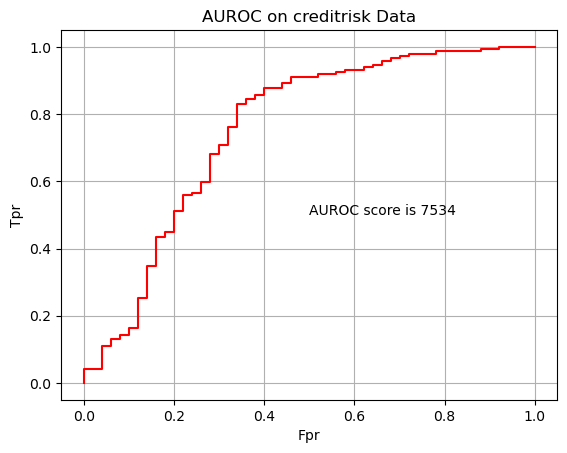

In [80]:
plt.plot(fpr,tpr,color='r')
plt.xlabel('Fpr')
plt.ylabel('Tpr')
plt.title('AUROC on creditrisk Data')
plt.grid()
plt.text(x=0.5,y=0.5,s='AUROC score is 7534')

In [81]:
df = pd.DataFrame(cr_tab,columns =['Loan_Reject','Loan_Approve'])

In [82]:
df

,Loan_Reject,Loan_Approve
0,24,26
1,13,134


In [83]:
df.index =['Loan_Reject',"Loan_Approve"]

In [84]:
df

,Loan_Reject,Loan_Approve
Loan_Reject,24,26
Loan_Approve,13,134


# Conclusion

•	True positives(TP) : 134 (cases correctly predicted as "Loan_Approve")

•	False positives(FP) : 26 (cases incorrectly predicted as "Loan_Approve" when they were actually          "Loan_Reject")

•	True negatives (TN) : 24 (cases correctly predicted as "Loan_Reject")

•	False negatives (FN) : 13 (cases incorrectly predicted as "Loan_Reject" when they were actually         "Loan_Approve")
	

1.The model tends to correctly identify cases where loans are approved (high true positive rate).

2.There is a moderate number of false positives, meaning the model sometimes predicts that a loan will be approved when it actually gets rejected.

3.The false negative rate is relatively low, indicating that the model is fairly good at identifying cases where loans will be rejected.

4.Overall, the model seems to perform reasonably well, but there is room for improvement, particularly in reducing false positives.





